In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
train=pd.read_csv('Logistic_X_Train.csv')
test=pd.read_csv('Logistic_X_Test.csv')
target=pd.read_csv('Logistic_Y_Train.csv')
x_train=train.values
y_train=target.values
data=np.hstack((x_train,y_train))
np.random.shuffle(data)

In [32]:
x_train[0]

array([-1.23937466,  0.74910149, -0.52851491])

In [33]:
data.shape

(3000, 4)

In [34]:
x_train=data[:,:-1]
y_train=data[:,-1]

In [35]:
train.head()

,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603


In [36]:
target.head()

,label
0,1
1,1
2,1
3,0
4,0


#DATA VISUALISATION

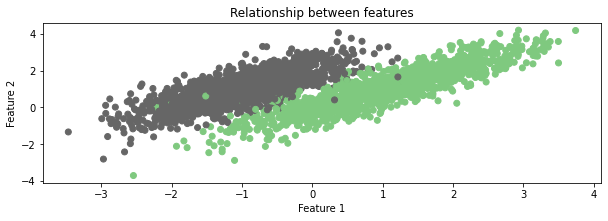

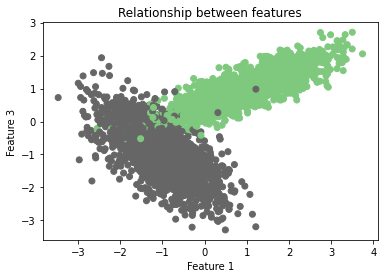

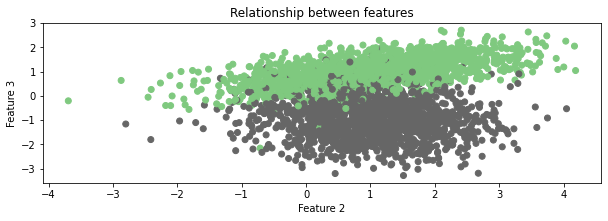

In [37]:
n=train.shape[1]
i=0
while i+1<n:
    plt.figure(figsize=(10,10))
    plt.subplot(3,1,i+1)
    for j in range(i+1,n):        
        plt.scatter(x_train[:,i],x_train[:,j],c=y_train,cmap=plt.cm.Accent)
        plt.xlabel('Feature {}'.format(i+1))
        plt.ylabel('Feature {}'.format(j+1))
        plt.title('Relationship between features')
        plt.show()
    i+=1    

#WE CAN SEE THAT THE GRAPHS ARE LINEARLY SEPERABLE

#NORMALISING THE DATA

In [38]:
u=x_train.mean(axis=0)
std=x_train.mean(axis=0)
x_train=(x_train-u)/std

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model=LogisticRegression()
y_train=y_train.reshape((-1,1))


In [41]:
model.fit(x_train,y_train)

C:\Users\91763\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [42]:
model.intercept_

array([-1.43867284])

In [43]:
model.coef_

array([[-0.0315413 ,  3.31632099, -0.07005849]])

In [44]:
model.score(x_train,y_train)*100

99.53333333333333

In [51]:
x_test=test.values
x_test=(x_test-u)/std
pred=model.predict(x_test)

In [52]:
prediction=pd.DataFrame(pred,columns=['label'])
prediction.to_csv('predictions.csv',index=False)